# Задача 9.1

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
frame = pd.read_csv('forestfires.csv', header=0, sep=',')

In [4]:
frame

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


# Преобразование данных

In [5]:
frame.drop('day', axis=1, inplace=True)

In [6]:
frame

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [7]:
months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
for i in range(months.size):
    frame.loc[frame['month'] == months[i],'month'] = i + 1

In [8]:
frame

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,8,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,8,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,8,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,9,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


In [9]:
frame.dtypes

X          int64
Y          int64
month     object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [10]:
frame['month'] = frame['month'].astype(int)

In [11]:
frame.dtypes

X          int64
Y          int64
month      int32
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [12]:
frame['constant term'] = 1

In [13]:
frame

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,constant term
0,7,5,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,8,6,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
5,8,6,8,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,1
6,8,6,8,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,1
7,8,6,8,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,1
8,8,6,9,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,1
9,7,5,9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,1


In [14]:
data = pd.DataFrame.as_matrix(frame)
np.random.shuffle(data)

Разобьём выборку на 2 части в отношении 7:3 :

In [15]:
517 * 0.7

361.9

In [16]:
first_part = data[:362]
second_part = data[362:]

   Построим регрессионную модель по первой части выборки. Линейная регрессионная модель - $X = Z\theta + \varepsilon$. В этом случае X - столбец area, Z - матрица, столбцы которой - другие данные, $\theta$ - коэффициенты линейной комбинации.

In [17]:
def make_pair(x,y):
    return lambda n: x if n==0 else y

def first(p):
    return p(0)

def second(p):
    return p(1)

def find_params(part):
    x = part[:, part[0].size - 2].reshape(part[:, 0].size, 1)
    z = np.empty((part[:, 0].size, part[0].size - 1))
    z[:, :z[0].size - 1] = part[:, :z[0].size - 1]
    z[:,z[0].size - 1] = part[:, part[0].size - 1]
    return make_pair(x, z)

In [85]:
p = find_params(first_part)
x = first(p)
z = second(p)

Тогда оценка наименьших квадратов параметра $\theta$ - $\widehat{\theta} = (Z^{T}Z)^{-1} Z^{T} X$. Найдем эту оценку:

In [86]:
def find_theta_est(x, z):
    return np.linalg.inv(z.T.dot(z)).dot(z.T).dot(x)

In [87]:
theta_est = find_theta_est(x, z)

Применим модель ко второй части выборки:

In [21]:
p = find_params(second_part)
real_x = first(p)
z2 = second(p)
x_est = z2.dot(theta_est)

Среднеквадратичная ошибка - $\sigma = \sqrt{\frac{\sum_{i=1}^n\left(X_i-\widehat{X}\right)^2}{n}}$, где $X_i$ - реальное значение, $\widehat{X}$ - предсказанное. 

In [22]:
from math import sqrt

In [41]:
def find_standart_deviation(x_est, real_x):
    return sqrt(((x_est - real_x)**2).sum() / x_est.size)

Среднеквадратичная ошибка для второй части выборки:

In [43]:
find_standart_deviation(x_est, real_x)

88.73072446791205

# Регрессионная модель для $ln(с + x)$

In [44]:
from math import log

### Среднеквадратичная ошибка для преобразованных значений

Построим линейную регрессионную модель, найдем оценку наименьших квадратов параметра $\theta$ и среднеквадратичную ошибку для преобразованных значений:

In [45]:
n = 100

In [80]:
p = find_params(first_part)
x = first(p)
z = second(p)
c = np.arange(1, n + 1, 1)
theta_est1 = np.empty((12, n))
for i in range(n):
    x1 = np.log(x + c[i])
    theta_est1[:, i] = np.linalg.inv(z.T.dot(z)).dot(z.T).dot(x1).reshape(12)

In [81]:
p2 = find_params(second_part)
x2 = first(p2)
z2 = second(p2)
x_est = np.empty((x2.size, n))
st_dev2 = np.empty(n)
for i in range(n):
    x_est[:, i] = z2.dot(theta_est1[:, i])
    st_dev2[i] = np.std(x_est[:, i] - np.log(x2 + c[i]))

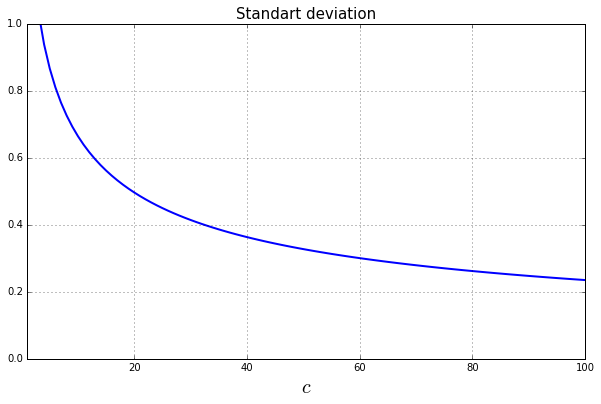

In [82]:
plt.figure(figsize=(10, 6))

plt.plot(c, st_dev2, linewidth = 2)
plt.xlim(1, n)
plt.ylim(0, 1)
plt.xlabel('$c$', fontsize = 20)
plt.title('Standart deviation', fontsize = 15)
plt.grid() 
plt.show()

### Среднеквадратичная ошибка для исходных значений

Для нахождения среднеквадратичной ошибки для исходных данных, применим к оценкам обратное преобразование - $f^{-1}(y) = e^{y} - c$:

In [77]:
res = np.empty(n)
for i in range(n):
    x_est[:, i] = np.exp(x_est[:, i]) - c[i]
    res[i] = np.std(x_est[:, i] - x2)

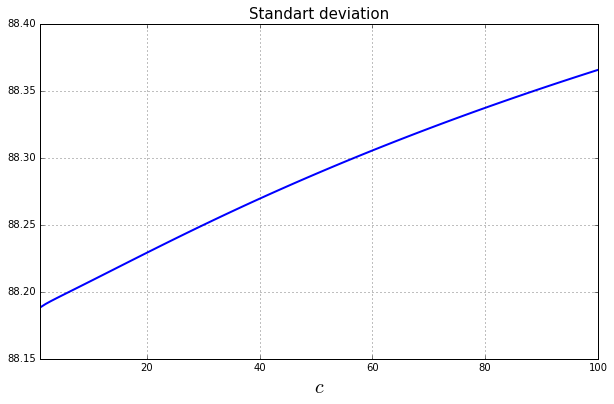

In [78]:
plt.figure(figsize=(10, 6))

plt.plot(c, res, linewidth = 2)
plt.xlim(1, n)
#plt.ylim(0, 1000)
plt.xlabel('$c$', fontsize = 20)
plt.title('Standart deviation', fontsize = 15)
plt.grid() 
plt.show()